In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("cancer patient data sets.csv")
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
df.drop(['index', 'Patient Id'], inplace=True, axis=1)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df = df.replace({'Level': {'Low': 1, 'Medium': 2, 'High': 3}})
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,3
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,3
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

In [6]:
x=df[['Alcohol use', 'Dust Allergy', 'Genetic Risk', 'Balanced Diet', 'Obesity', 'Passive Smoker', 'Coughing of Blood']]
x

,Alcohol use,Dust Allergy,Genetic Risk,Balanced Diet,Obesity,Passive Smoker,Coughing of Blood
0,4,5,3,2,4,2,4
1,1,5,4,2,2,4,3
2,5,6,5,6,7,3,8
3,7,7,6,7,7,7,8
4,8,7,7,7,7,7,9
...,...,...,...,...,...,...,...
995,7,7,7,7,7,8,7
996,8,7,7,7,7,8,7
997,5,6,5,6,7,3,8
998,8,7,7,7,7,7,9


In [7]:
y=df["Level"]
y

0      1
1      2
2      3
3      3
4      3
      ..
995    3
996    3
997    3
998    3
999    3
Name: Level, Length: 1000, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
X = StandardScaler().fit_transform(x)
X

array([[-0.21495391, -0.08333998, -0.74320237, ..., -0.21894114,
        -0.94996057, -0.35397126],
       [-1.36035665, -0.08333998, -0.27282112, ..., -1.16062345,
        -0.08439285, -0.7660449 ],
       [ 0.166847  ,  0.42175079,  0.19756012, ...,  1.19358233,
        -0.51717671,  1.29432331],
       ...,
       [ 0.166847  ,  0.42175079,  0.19756012, ...,  1.19358233,
        -0.51717671,  1.29432331],
       [ 1.31224973,  0.92684156,  1.13832262, ...,  1.19358233,
         1.21395873,  1.70639695],
       [ 0.166847  ,  0.42175079,  0.19756012, ...,  1.19358233,
        -0.51717671,  1.29432331]])

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
tf.random.set_seed(42)

In [43]:
model_1=tf.keras.Sequential([tf.keras.layers.Dense(16,activation="relu"),tf.keras.layers.Dense(8,activation="relu"),tf.keras.layers.Dense(8,activation="relu"),
                             tf.keras.layers.Dense(10,activation="sigmoid")])
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.optimizers.Adam(),metrics="accuracy")
history=model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 2.2531 - accuracy: 0.2425
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 2.0923 - accuracy: 0.4462
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 1.8894 - accuracy: 0.4825
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.6300 - accuracy: 0.4150
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3497 - accuracy: 0.4225
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 1.0564 - accuracy: 0.6400
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7816 - accuracy: 0.7650
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5964 - accuracy: 0.7775
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5074 - accuracy: 0.7750
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4635 - accuracy: 0.7575
Epoch 11/

In [44]:
y_preds=model_1.predict(X_test).argmax(axis=1)
y_preds

7/7 [==============================] - 0s 3ms/step


array([2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 3, 1, 3, 3, 3, 3, 2,
       1, 2, 3, 1, 2, 3, 1, 1, 1, 3, 2, 1, 1, 3, 3, 2, 3, 1, 3, 3, 1, 2,
       2, 1, 1, 2, 3, 1, 2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2,
       3, 3, 2, 3, 3, 1, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 1, 2, 3, 3, 3, 1,
       3, 3, 1, 1, 2, 3, 3, 3, 3, 3, 2, 1, 1, 3, 1, 1, 2, 3, 3, 2, 2, 2,
       2, 3, 3, 1, 2, 3, 2, 3, 2, 2, 3, 3, 1, 1, 2, 3, 3, 3, 3, 3, 1, 2,
       1, 3, 2, 1, 2, 3, 2, 2, 1, 2, 1, 1, 3, 2, 1, 3, 1, 3, 3, 1, 1, 3,
       1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 1, 3,
       2, 1, 2, 3, 1, 3, 1, 2, 3, 2, 3, 2, 1, 2, 1, 1, 2, 3, 3, 2, 3, 3,
       1, 2], dtype=int64)

In [45]:
np.array(y_test)

array([2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 3, 1, 3, 3, 3, 3, 2,
       1, 2, 3, 1, 2, 3, 1, 1, 1, 3, 2, 1, 1, 3, 3, 2, 3, 1, 3, 3, 1, 2,
       2, 1, 1, 2, 3, 1, 2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2,
       3, 3, 2, 3, 3, 1, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 1, 2, 3, 3, 3, 1,
       3, 3, 1, 1, 2, 3, 3, 3, 3, 3, 2, 1, 1, 3, 1, 1, 2, 3, 3, 2, 2, 2,
       2, 3, 3, 1, 2, 3, 2, 3, 2, 2, 3, 3, 1, 1, 2, 3, 3, 3, 3, 3, 1, 2,
       1, 3, 2, 1, 2, 3, 2, 2, 1, 2, 1, 1, 3, 2, 1, 3, 1, 3, 3, 1, 1, 3,
       1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 1, 3,
       2, 1, 2, 3, 1, 3, 1, 2, 3, 2, 3, 2, 1, 2, 1, 1, 2, 3, 3, 2, 3, 3,
       1, 2], dtype=int64)

In [46]:
model_1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000


[0.0014776646858081222, 1.0]

In [47]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(15,15),text_size=10):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels,
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

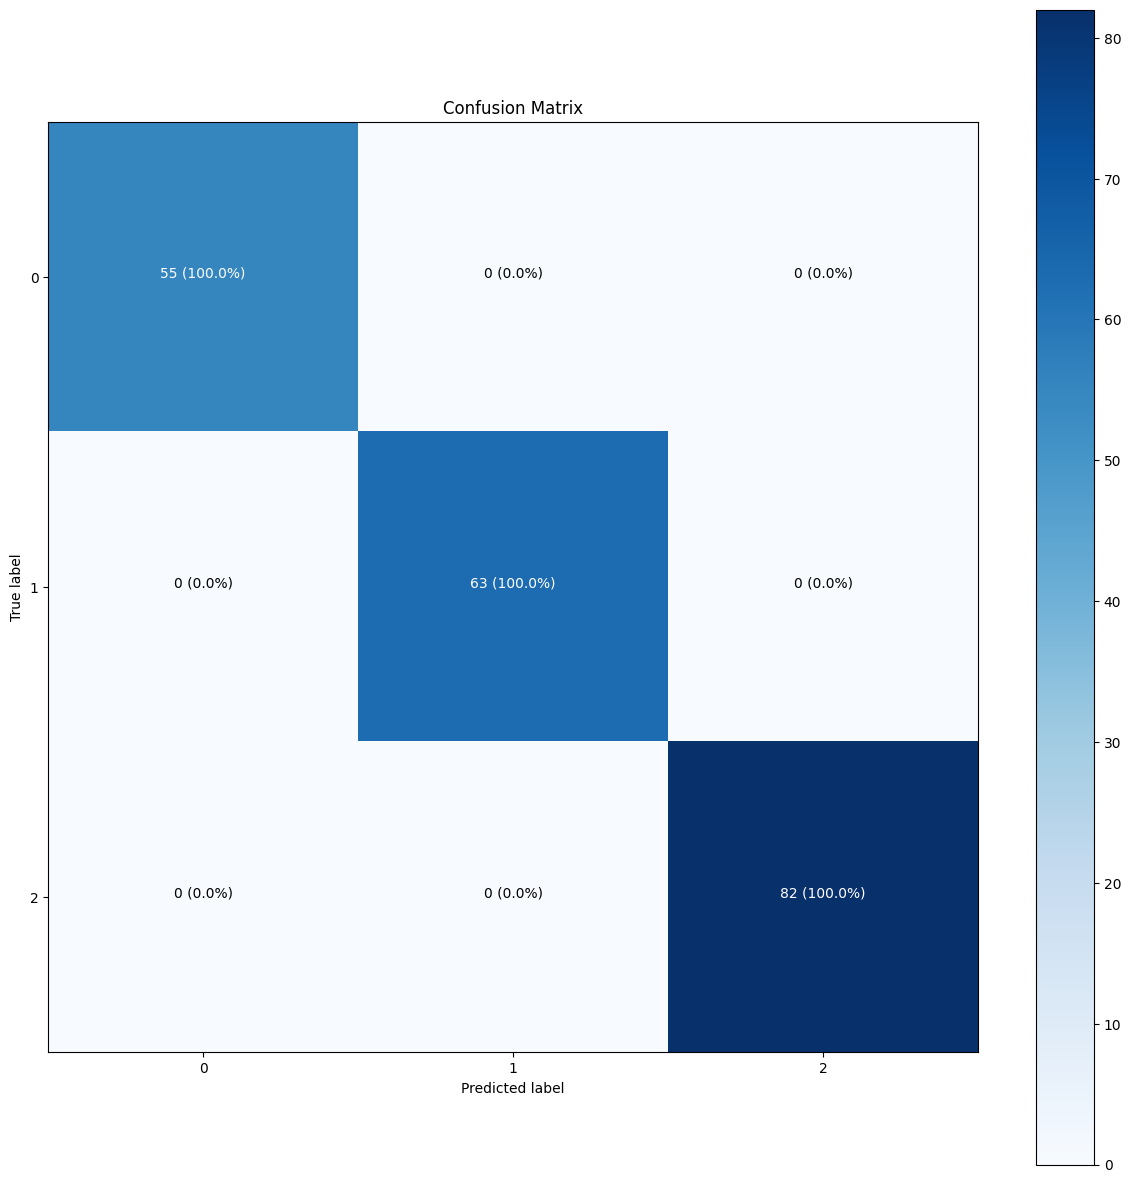

In [48]:
make_confusion_matrix(y_true=y_test,y_pred=y_preds)

In [ ]:
model_1.save("lungcancer.h5")